In [1]:
# Imports as always...
import RQs
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Beautification.
sns.set_style('darkgrid')
sns.set_style({'font.family':'serif', 'font.serif':'Times New Roman'})
sns.set_context('paper')
sns.set_palette('Set2')

# Preparing the Data

In [3]:
data_handler = RQs.DataHandler('edinburgh', 'datasets')

data = data_handler.prepare().iloc[:,4:]
data

c:\University\Queen's University\Winter 2023\CISC 351 - Advanced Data Analytics\Project\Code\RQs.py:319: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  skewness = self.master_data.skew().sort_values(ascending=False)


,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,...,host_about_compound,perceived_review_neg,perceived_review_neu,perceived_review_pos,perceived_review_compound,success_score,weighted_image_score_mean,weighted_image_score_max,weighted_image_score_min,weighted_image_score_std
0,1.501376,1.681736,-2.071113,-1.395538,-0.795128,0.784984,0.898121,-0.187075,0.113623,0.338153,...,0.794275,1.351861,1.882896,-2.159543,-2.518016,3.098236,-0.337620,-0.166652,-0.488546,0.003647
1,1.434897,0.197869,0.711956,-0.159973,1.257659,-0.710659,-0.396459,-0.187075,0.113623,0.338153,...,1.186347,0.276679,-0.114089,0.151070,-0.954076,0.507008,-0.376584,-0.257990,-0.656064,0.501114
2,1.432006,0.197869,0.711956,0.611092,-0.795128,0.501203,0.531463,-0.187075,0.113623,0.338153,...,0.078059,0.191245,-0.723321,0.748319,0.722720,1.383375,-0.484759,-0.811359,0.350987,-0.325497
3,1.421408,0.197869,0.711956,-0.734332,-0.795128,-0.249876,-0.396459,2.100419,0.113623,0.338153,...,0.000397,-0.088542,0.279636,-0.167088,0.103902,-0.220610,0.653647,-0.166718,-0.246512,0.221592
4,1.420445,1.037480,0.711956,-2.011824,1.257659,-0.710659,-0.809626,-0.187075,0.113623,0.338153,...,-1.014740,0.216019,-0.649920,0.674021,0.184161,-0.634288,-1.455918,0.263912,-2.280877,1.314853
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4624,1.701777,1.681736,0.711956,0.840800,-0.795128,-0.710659,-0.809626,-0.187075,0.113623,-2.957239,...,0.960662,0.181050,-0.844124,0.865756,-1.719561,-0.980681,-1.771500,-0.446832,-1.313951,0.199675
4625,1.675763,0.197869,0.711956,0.611092,-0.795128,0.702178,0.598113,2.100419,0.113623,0.338153,...,0.951148,0.374263,0.694830,-0.641348,0.418274,-1.414228,-0.090019,0.228584,-0.082652,0.002921
4626,1.675763,0.197869,0.711956,0.611092,-0.795128,0.702178,0.598113,2.100419,0.113623,0.338153,...,0.951148,0.607216,-0.031573,-0.008788,-1.198183,-0.158725,-0.528467,0.414019,-0.051216,-0.013965
4627,1.647823,1.037480,0.711956,-1.765134,1.257659,-0.710659,-0.396459,-0.187075,0.113623,0.338153,...,1.183692,0.502400,-0.258658,0.243064,0.716309,0.406936,0.127450,-0.179033,-0.828668,-0.114111


# RQ3

In [4]:
# Define the structured-only, unstructured-only, and hybrid datasets.
structured_features = [
    'host_since', 'host_response_time',
    'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
    'host_listings_count', 'host_total_listings_count',
    'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
    'latitude', 'longitude', 'room_type', 'accommodates', 'bedrooms',
    'beds', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
    'maximum_minimum_nights', 'minimum_maximum_nights',
    'maximum_maximum_nights', 'maximum_nights_avg_ntm', 'has_availability',
    'availability_30', 'availability_60', 'availability_90',
    'availability_365', 'number_of_reviews', 'number_of_reviews_l30d',
    'first_review', 'last_review', 'instant_bookable',
    'calculated_host_listings_count',
    'calculated_host_listings_count_entire_homes',
    'calculated_host_listings_count_private_rooms', 'reviews_per_month'
]

unstructured_features = [
    'title_neg', 'title_neu', 'title_pos', 'title_compound',
    'description_neg', 'description_neu', 'description_pos',
    'description_compound', 'neighborhood_overview_neg',
    'neighborhood_overview_neu', 'neighborhood_overview_pos',
    'neighborhood_overview_compound', 'host_about_neg', 'host_about_neu',
    'host_about_pos', 'host_about_compound', 'perceived_review_neg',
    'perceived_review_neu', 'perceived_review_pos',
    'perceived_review_compound',
    'weighted_image_score_mean', 'weighted_image_score_max',
    'weighted_image_score_min', 'weighted_image_score_std'
]

hybrid_features = structured_features + unstructured_features

experiment = RQs.RQ3(data, structured_features, unstructured_features, hybrid_features)
results = experiment.run().reset_index().iloc[:,1:]
results

c:\Users\bwpri\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\bwpri\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\bwpri\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,Model,Dataset,MAE,MSE,R2 Score
0,Linear Regression,Structured,0.265841,0.400394,0.741817
1,Linear Regression,Unstructured,0.803049,0.721429,0.139871
2,Linear Regression,Hyrbid,0.256183,1.038002,0.742419
3,Support Vector Regression (SVR),Structured,0.170585,0.298811,0.834329
4,Support Vector Regression (SVR),Unstructured,0.726352,0.667532,0.222019
5,Support Vector Regression (SVR),Hyrbid,0.186028,1.047654,0.812958
6,Multi-Layer Perceptron (MLP),Structured,0.174714,0.314707,0.830319
7,Multi-Layer Perceptron (MLP),Unstructured,0.764390,0.686312,0.181278
8,Multi-Layer Perceptron (MLP),Hyrbid,0.254133,1.067864,0.744481
9,Gaussian Process Regression,Structured,0.628916,0.630569,0.389202


Text(0, 0.5, '')

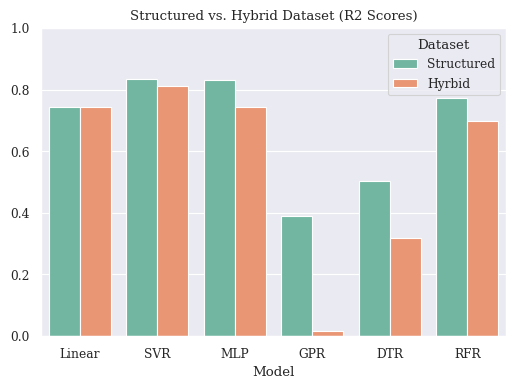

In [5]:
# Plot R2 scores...
data = results.replace({
    'Linear Regression' : 'Linear',
    'Support Vector Regression (SVR)' : 'SVR',
    'Multi-Layer Perceptron (MLP)' : 'MLP',
    'Gaussian Process Regression' : 'GPR',
    'Decision Tree Regression' : 'DTR',
    'Random Forest Regression' : 'RFR'
})[results['Dataset'] != 'Unstructured']

fig, ax = plt.subplots(figsize=(6,4))

sns.barplot(
    data=data, 
    x='Model', y='R2 Score', hue='Dataset',
    ax = ax
)

ax.set_ylim(0,1)
ax.set_title('Structured vs. Hybrid Dataset (R2 Scores)')
ax.set_ylabel('')